<a href="https://colab.research.google.com/github/seanigens/IntroDataViz/blob/main/Practice_Activity_8_1_S544.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
file_path = "/content/drive/My Drive/S544/ha_1.csv"
data = pd.read_csv(file_path)
print(data)

                         Name  age  sex  cp  trtbps  chol  restecg  thalach  \
0             Magnolia Cassin   60    1   1     117   230        1      160   
1       Dr. Cathern Heathcote   60    0   3     102   318        1      160   
2                  Miles Wolf   62    0   3     130   263        1       97   
3               Mikaila Block   43    1   1     115   303        1      181   
4    Mrs. Jacquline Marquardt   66    1   1     120   302        0      151   
..                        ...  ...  ...  ..     ...   ...      ...      ...   
199         Bridgett Franecki   55    0   1     128   205        2      130   
200          Mr. Foster Zieme   51    1   3      94   227        1      154   
201          Lashanda Hagenes   42    1   2     120   295        1      162   
202        Levern Trantow III   35    0   1     138   183        1      182   
203       Mahalia DuBuque DVM   34    1   4     118   182        0      174   

      diagnosis  
0    No Disease  
1       Disease

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [7]:
X = data[['age', 'chol']]
y = data['diagnosis'].apply(lambda x: 1 if x == 'Disease' else 0)

log_reg = LogisticRegression()
log_reg.fit(X, y)

b0 = log_reg.intercept_[0]
b1 = log_reg.coef_[0][0]
b2 = log_reg.coef_[0][1]
age = 55
p50 = 0.5
c50 = (np.log(p50 / (1 - p50)) - b0 - b1 * age) / b2
p90 = 0.9
c90 = (np.log(p90 / (1 - p90)) - b0 - b1 * age) / b2
c50, c90

(367.8748897986711, -851.9660996777573)

## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [8]:
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
coef = lda.coef_[0]
inter = lda.intercept_
clda = - (inter + coef[0] * age) / coef[1]
clda[0]

368.23535752993797

## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

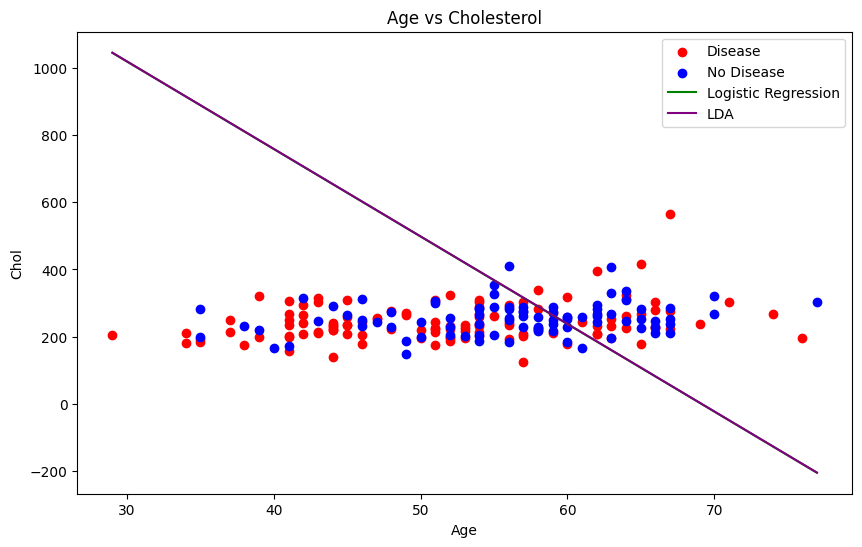

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(data[data['diagnosis'] == 'Disease']['age'], data[data['diagnosis'] == 'Disease']['chol'], color='red', label='Disease')
plt.scatter(data[data['diagnosis'] == 'No Disease']['age'], data[data['diagnosis'] == 'No Disease']['chol'], color='blue', label='No Disease')

x_values = np.array([data['age'].min(), data['age'].max()])
y_values_log_reg = - (b0 + b1 * x_values) / b2
plt.plot(x_values, y_values_log_reg, label='Logistic Regression', color='green')
y_values_lda = - (inter + coef[0] * x_values) / coef[1]
plt.plot(x_values, y_values_lda, label='LDA', color='purple')

plt.xlabel('Age')
plt.ylabel('Chol')
plt.title('Age vs Cholesterol')
plt.legend()
plt.show()